# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 2do parcial, 2020</center>           

La duración del parcial es de 3 horas. El parcial consta de 3 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al ejercicio 1. Hay un notebook por ejercicio planteado.

* [Ejercicio 1 - K-means](#Ejercicio1) (30 puntos)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Ejercicio 1

Este ejercicio explora el agrupamiento con K-means como estrategia de reducción de dimensionalidad, en particular como etapa de pre-procesado antes de un algoritmo de clasificación. El primer enfoque consiste en entrenar un modelo de regresión logística para clasificación de imágenes de dígitos. Luego, el otro enfoque consiste en usar el algoritmo de K-means para agrupar las imágenes y entrenar un nuevo modelo de regresión logística pero que usa como entrada la distancia de cada imagen a cada uno de los centros de los grupos. Para ello se implementa el algoritmo de K-means.  

Considere el conjunto de dígitos provisto por sklearn, que consiste 1.797 imágenes de 8x8 en escala de grises que representan los dígitos del 0 al 9. 

In [2]:
X, y = load_digits(return_X_y=True)

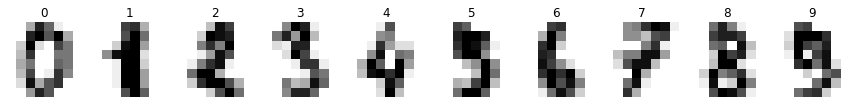

In [3]:
_, axes = plt.subplots(1, 10, figsize=(12,30))
for ind, ax in enumerate(axes):
    ax.set_axis_off()
    ax.imshow(X[ind].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % y[ind])
plt.tight_layout()

### Ejercicio 1 - parte a)  

Divida los datos en un conjunto de entrenamiento y otro de test usando la función `train_test_split` de sklearn. La cantidad de datos del conjunto de test debe ser **1/4** del total.

**IMPORTANTE:** Presete atención a usar el parámetro `random_state` tal como está definido en la siguiente celda.

In [4]:
random_state = 42

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, 
                                                    test_size=0.25, random_state=random_state)


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

### Ejercicio 1 - parte b)  

Ajuste un modelo de regresión logística para predecir el dígito de cada imagen. 

**NOTA:** El problema de clasificación multi-clase debe manejarse como muchos clasificadores de uno contra el resto. 

**IMPORTANTE:** Preste atención a usar los valores de los parámetros `random_state`, `solver` y `max_iter` tal como se definen en la siguiente celda.

In [5]:
random_state = 42
solver = "lbfgs"
max_iter = 5000

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

log_reg = LogisticRegression(multi_class="ovr", solver=solver, max_iter=max_iter, random_state=random_state) 
log_reg.fit(X_train, y_train)

###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

### Ejercicio 1 - parte c)  

Calcule las predicciones para los datos de test y calcule el error de test (*el error de test debería ser de menos 5\%*). 

In [6]:
###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

pred_test = log_reg.predict(X_test)
error_logreg = np.mean(pred_test!=y_test)

###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################
print('El algoritmo de regresión logística devuelve un error de test de: %f' % error_logreg)

El algoritmo de regresión logística devuelve un error de test de: 0.031111


### Ejercicio 1 - parte d)  

Complete el siguiente código para implementar el algoritmo de agrupamiento de k-means. 

**NOTA:** se debe utilizar distancia euclídea.

In [7]:
from sklearn.metrics import pairwise_distances

def k_means(X, k, semilla=42):    
    '''
    Entrada:
        X - arreglo de tamaño (N,d) que contiene los vectores de entrada
        k - numero de clusters a encontrar
        semilla - semilla que se usa para inicializar los centros.
                  Elegir aleatoriamente k vectores de X
    Salida:
        centros: arreglo de tamaño (k,d) que contiene los centros de los 
                 clusters encontrados
        etiquetas: vector de largo N que contiene los clusters 
                   a los que se asignaron las muestras
        distancias: arreglo de tamaño (N,k) que contiene las distancias de
                    cada vector de entrada a cada uno de los centros
    '''
    
    np.random.seed(semilla)
    
    ###########################################################################################
    ##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
    ###########################################################################################
    
    # Se inicializan los centros de los clusters a muestras elegidas aleatoriamente 
    # Esto quiere decir elegir aleatoriamente k vectores de X
    # centros =   
    indices = np.random.permutation(X.shape[0])[:k]
    centros = X[indices]
    
    convergio = False
    n_iter = 0
    
    centros_nuevos = np.empty(centros.shape)
    
    while not convergio:
        
        # 1. Se calcula la distancia de cada punto a cada uno de los centros.
        # Se sugiere usar pairwise_distances del paquete metrics de sklearn.
        distancias = pairwise_distances(X, Y=centros)
  

        # 2. Se asignan las etiquetas al cluster cuyo centro es el más cercano.     
        etiquetas = np.argmin(distancias, axis=1)
        
        # 3. Se calculan los nuevos centros.
        for etiqueta in range(k):
            X_asociados = X[etiquetas==etiqueta]
            if len(X_asociados) > 0:
                centros_nuevos[etiqueta] = np.mean(X_asociados, axis=0)
  

        # 4. Se evalúa la condición de convergencia (que los centros no cambien)
        convergio = np.all(centros == centros_nuevos)
        
        # 5. Se actualiza la variable centros y se aumenta el número de iteración
        centros = centros_nuevos.copy()
        n_iter += 1 

        
    ###########################################################################################
    ##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
    ###########################################################################################
    
    print('El algoritmo finalizó en la iteración: %d' % (n_iter))
    
    return centros, etiquetas, distancias

### Ejercicio 1 - parte e)  

Utilice el algoritmo de k-means para agrupar los datos de entrenamiento en **k=50** grupos. 

Calcule la distancia de cada punto de test a cada uno de los centros, como un arreglo `distancias_test` de tamaño (N,k). 

In [8]:
# cantidad de clusters para el algoritmo de k-means
k = 50

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

    centros, asignaciones, distancias = k_means(X_train, k)
    distancias_test = pairwise_distances(X_test, Y=centros)

###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

El algoritmo finalizó en la iteración: 13


El siguiente código sirve como verificación cualitativa de la implementación de k-means. Muestra algunos dígitos del cluster que se indica en la variable `clust`. Ejecútelo varias veces cambiando el valor de `clust`. Debería ver imágenes similares de un mismo dígito dentro de clada cluster.

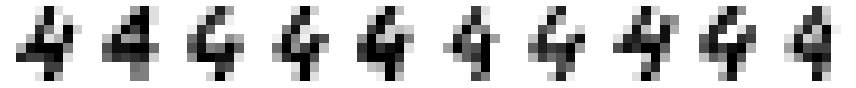

In [9]:
# clust puede tomar un valor entre 0 y k-1 (49 en este caso)
# cambie el valor de clust para visualizar algunos elementos
clust = 25

X_clust = X_train[asignaciones==clust, :]
n_clust = X_clust.shape[0]
nc = min(10, n_clust)
_, axes = plt.subplots(1, nc, figsize=(12,30))
for ind, ax in enumerate(axes):
    ax.set_axis_off()
    ax.imshow(X_clust[ind].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.tight_layout()

### Ejercicio 1 - parte f)  

Use el agrupamiento de los datos como preprocesamiento para la clasificación. Para ello, ajuste un modelo de regresión logística para predecir el dígito de cada imagen, pero remplazando cada imagen por la distancia de ella a cada uno de los centros del agrupamiento. 

**NOTA:** Nuevamente el problema de clasificación multi-clase debe manejarse como muchos clasificadores de uno contra el resto. 

**IMPORTANTE:** Preste atención a usar los valores de los parámetros `random_state`, `solver` y `max_iter` tal como se definen en la siguiente celda.

In [10]:
random_state = 42
solver = "lbfgs"
max_iter = 5000

###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

log_reg_kmeans = LogisticRegression(multi_class="ovr", solver=solver, max_iter=max_iter, random_state=random_state)
log_reg_kmeans.fit(distancias, y_train)

###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

### Ejercicio 1 - parte g)  

Usando el nuevo modelo de regresión logística calcule las predicciones para los datos de test y calcule el error de test (*debería ser de menos 3\%*). 

In [13]:
###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

pred_test_kmeans = log_reg_kmeans.predict(distancias_test)
error_logreg_kmeans = np.mean(y_test!=pred_test_kmeans)


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################
print('El algoritmo de regresión logística devuelve un error de test de: %f' % error_logreg_kmeans)

El algoritmo de regresión logística devuelve un error de test de: 0.022222


### Ejercicio 1 - parte h)  

Calcule la variación relativa del error del modelo nuevo respecto al error del modelo original. 

Comente los resultados obtenidos. Sugiera alguna estrategia que permita mejorar los resultados. 

In [12]:
###########################################################################################
##################    EMPIEZA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################

# variación relativa del error
var_error = (error_logreg-error_logreg_kmeans)/error_logreg 


###########################################################################################
##################    TERMINA ESPACIO PARA COMPLETAR CODIGO   #############################
###########################################################################################
print('La variación relativa del error entre el modelo original y el modelo nuevo es de: %f' % var_error)


La variación relativa del error entre el modelo original y el modelo nuevo es de: 0.285714


**Respuesta:**

Se tiene una mejora del 28% utilizando kmeans respecto a simplemente hacer la regresión.

Una forma de mejorar los resultados es variando los hiperparámetros (k por ejemplo). Para hacer el estudio de que valores convienen respecto a otros se utiliza la validación. La validación puede hacer reservando un conjunto de datos para validar, o realizando lo que se llama validación cruzada.